In [1]:
from sdRDM import DataModel
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

from CaliPytion.tools.standardcurve import StandardCurve

In [2]:
lib = DataModel.from_git(url="https://github.com/FAIRChemistry/CaliPytion.git")
lib.Calibration()

- Type: string
- Description: Unique identifier of the calibrated reactant.
- date_measured


IndexError: list index out of range

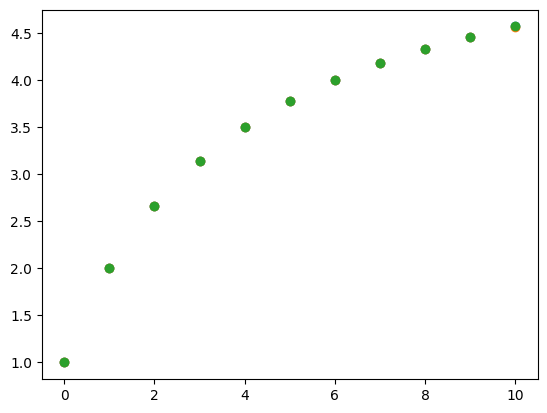

In [ ]:
def poly(x, a, b, c):
    return a * x / (b + x)


a = 5
b = 4
c = 2

conc = np.linspace(0, 10, 11)
abso = poly(x=conc, a=a, b=b, c=c)
data = np.tile(abso, 3).reshape((3, len(conc)))

for i in range(len(data)):
    data[i] = data[i] + np.random.normal(1, 0.001, len(conc))

for d in data:
    plt.scatter(conc, d)

In [ ]:
standard = lib.Standard(
    wavelength=420,
    concentration=list(conc),
    concentration_unit="mmole / l",
    absorption=[lib.Series(values=x.tolist()) for x in data],
)

calibration = lib.Calibration(
    reactant_id="s0", pH=7, temperature=37, temperature_unit="C", standard=[standard]
)
calibration

Calibration(id='calibration4', reactant_id='s0', date=None, pH=7.0, temperature=37.0, temperature_unit='C', device=None, standard=[Standard(id='standard2', wavelength=420.0, concentration=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], concentration_unit='mmole / l', absorption=[Series(id='series6', values=[0.9994221754686075, 2.0010213235369374, 2.6663719713454195, 3.1415968515519745, 3.499896420663014, 3.7766739776283273, 3.999999966517299, 4.182102016556913, 4.3327121142635185, 4.460915579367506, 4.572843633650482]), Series(id='series7', values=[1.0000766653368487, 2.0001060337990815, 2.667273740449885, 3.145182379921338, 3.4992434811680493, 3.7776143381938287, 3.999455109846163, 4.181701890266276, 4.333489621182997, 4.461587561978167, 4.571364229867816]), Series(id='series8', values=[1.0010393455671616, 1.99988583357931, 2.6664714084522796, 3.1427601713899116, 3.4989624172329683, 3.7791090387367627, 4.0001909407649725, 4.181395726352399, 4.334351145255061, 4.4603291871832

In [ ]:
with open("rational_test.xml", "w") as f:
    f.write(calibration.xml())

In [ ]:
standard_curve = StandardCurve.from_datamodel(calibration)

for model in standard_curve.models.values():
    print(model.params)
    print(model.aic)
    print(standard_curve.conc_unit)
    # model.visualize_residuals()
    plt.show()

Found calibration data at 420.0 nm
Standard curve data was blanked.
{'a': 0.43753791518343355}
-34.892578874803384
mmole / l
{'a': -0.04626214596533152, 'b': 0.80102620487747}
-121.31396684586305
mmole / l
{'b': -0.11872573208341715, 'a': 0.005207339945492534, 'c': 1.0277399845668163}
-204.51699101967583
mmole / l
{'a': 2.652391592581052e-16, 'b': 0.10000000010452266}
4157.720064536108
mmole / l
{'a': 5.000322928053282, 'b': 4.001160330105015}
-464.1718558311361
mmole / l


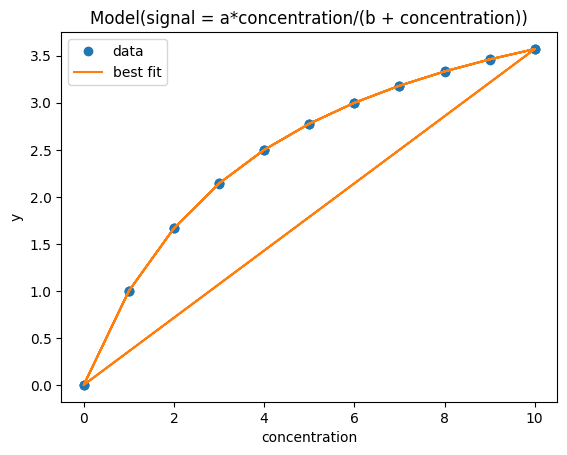

In [ ]:
standard_curve.calculate_concentration(np.array([0.12]))
standard_curve.models["Rational"].visualize_fit()

In [ ]:
# apply to enzymeml
import pyenzyme as pe
import json

In [ ]:
standard_curve.conc_unit

'mmole / l'

mmole / l
mmole / l
mmole / l
mmole / l
mmole / l
mmole / l
mmole / l


Chymotrypsin ihnhibition by fusion protein
>>> Reactants
	ID: s0 	 Name: N-Succinyl-Gly-Gly-Phe-p-nitroanilid
	ID: s1 	 Name: 4-Nitroanilin
>>> Proteins
	ID: p0 	 Name: Chymotrypsine
>>> Complexes
>>> Reactions
	ID: r0 	 Name: reaction

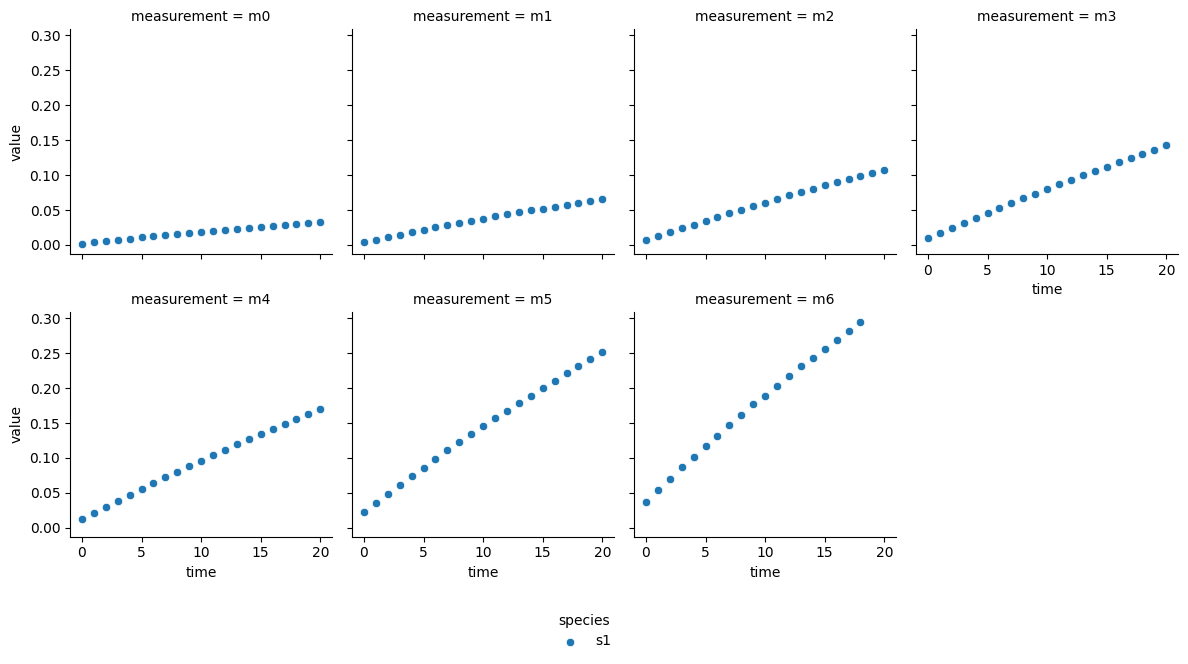

In [ ]:
path = "/Users/max/Library/Mobile Documents/com~apple~CloudDocs/Documents/code/papers/MTP_inhibition/data/chymotrypsin/Chymotrypsin_ihnhibition_by_fusion_protein.omex"


enzdoc = pe.EnzymeMLDocument.fromFile(path)

enzdoc.visualize()


standard_curve.apply_to_EnzymeML(enzdoc, "s1")

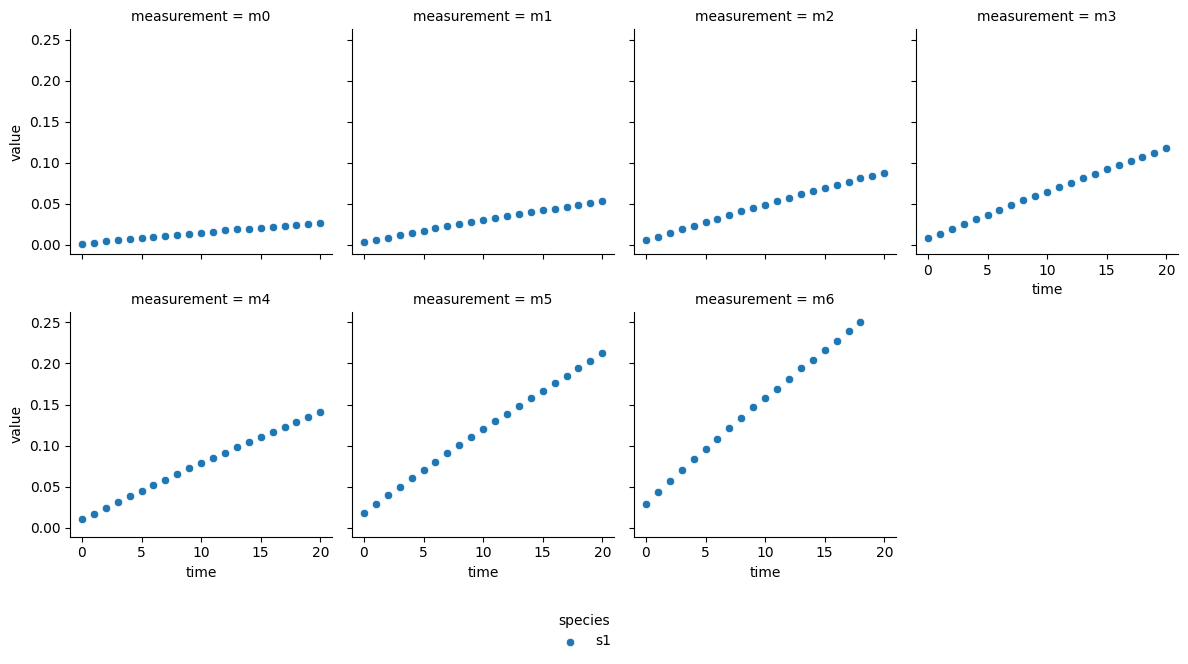

In [ ]:
enzdoc.visualize()

In [ ]:
from sympy import Symbol, Function, symbols, Eq

In [ ]:
kcat, Km, e, s, inact = symbols("kcat, Km, e, s, inact")

sympify

NameError: name 'sympify' is not defined

In [1]:
import sdRDM

In [2]:
sdRDM.DataModel.from_markdown("specifications/CalibrationModel.md")

Objects Calibration, Device, Standard, Spectrum, Result, Model, Parameter, Series
Enums   TemperatureUnits, ConcentrationUnits